# Feature Selection

It is the automatic selection of attributes in your data (such as columns in tabular data) that are most relevant to the predictive modeling problem you are working on. scikit learn offers you enormous built-in choices for feature selection.

In [18]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

In [19]:
df_wine = load_wine()
df_wine_features = pd.DataFrame(df_wine.data, columns=df_wine.feature_names)
df_wine_target = pd.DataFrame(df_wine.target, columns=['target'])

## Filter Methods

Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset.

### Variance Threshold

It is one of the most straightforward approaches, it drops the features with a variance value less than a specific threshold value which is given by you. Note that the higher variance a feature has, the more informative it is.

In [20]:
selector = VarianceThreshold(threshold=0.2) # Variance threshold
sel = selector.fit(df_wine_features)
sel_index = sel.get_support()
df_wine_norm_vt = df_wine_features.iloc[:, sel_index]

In [21]:
df_wine_norm_vt

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,127.0,2.80,3.06,2.29,5.64,3.92,1065.0
1,13.20,1.78,11.2,100.0,2.65,2.76,1.28,4.38,3.40,1050.0
2,13.16,2.36,18.6,101.0,2.80,3.24,2.81,5.68,3.17,1185.0
3,14.37,1.95,16.8,113.0,3.85,3.49,2.18,7.80,3.45,1480.0
4,13.24,2.59,21.0,118.0,2.80,2.69,1.82,4.32,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,1.68,0.61,1.06,7.70,1.74,740.0
174,13.40,3.91,23.0,102.0,1.80,0.75,1.41,7.30,1.56,750.0
175,13.27,4.28,20.0,120.0,1.59,0.69,1.35,10.20,1.56,835.0
176,13.17,2.59,20.0,120.0,1.65,0.68,1.46,9.30,1.62,840.0


### Mutual_info_classif

This method basically utilizes mutual information. It calculates the mutual information value for each of the independent variables with respect to the dependent variable and selects the ones which have the most information gain. In other words, it basically measures the dependency of features with the target value. A higher score means more dependent variables.

In [22]:
from sklearn.feature_selection import mutual_info_classif
threshold = 5  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(df_wine_features, df_wine_target.values.ravel(), random_state=0)

In [23]:
for score, f_name in sorted(zip(feature_scores, df_wine_features.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
df_wine_norm_mic = df_wine_features[high_score_features]

flavanoids 0.6664147135656704
proline 0.5666704889051473
color_intensity 0.5517594915785269
od280/od315_of_diluted_wines 0.5056374221639404
alcohol 0.4731586922796116


In [24]:
df_wine_norm_mic.columns

Index(['flavanoids', 'proline', 'color_intensity',
       'od280/od315_of_diluted_wines', 'alcohol'],
      dtype='object')

### F_classif
It uses the ANOVA f-test for the features and takes into consideration only linear dependency, unlike mutual information-based feature selection which can capture any kind of statistical dependency. Notice that the scores which are produced by different methods are totally different.

In [25]:
from sklearn.feature_selection import f_classif

threshold = 5 # the number of most relevant features
high_score_features = []
feature_scores = f_classif(df_wine_features, df_wine_target.values.ravel())[0]

In [35]:
for score, f_name in sorted(zip(feature_scores, df_wine_features.columns), reverse=True)[:threshold]:
      print(f_name, score)
      high_score_features.append(f_name)

print()
df_wine_fc = df_wine_features[high_score_features]
print(df_wine_fc.columns)

flavanoids 233.92587268154838
proline 207.92037390217828
od280/od315_of_diluted_wines 189.97232057888206
alcohol 135.07762424283948
color_intensity 120.66401844100372

Index(['flavanoids', 'proline', 'od280/od315_of_diluted_wines', 'alcohol',
       'color_intensity', 'flavanoids', 'proline',
       'od280/od315_of_diluted_wines', 'alcohol', 'color_intensity',
       'flavanoids', 'proline', 'od280/od315_of_diluted_wines', 'alcohol',
       'color_intensity'],
      dtype='object')


### SelectKBest
This class is actually a more general approach compared to the above-mentioned classes since it takes an additional scoring function parameter which states which function to use in feature selection.

The chi-square test measures the dependence between stochastic variables, thus we can eliminate the features that are most likely to be independent of the target by using this function. It is basically for evaluating whether the difference between two separate groups of non-negative samples is by random chance or not.

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

threshold = 5  # the number of most relevant features
skb = SelectKBest(score_func=chi2, k=threshold)
sel_skb = skb.fit(df_wine_features, df_wine_target)
sel_skb_index = sel_skb.get_support()
df_wine_skb = df_wine_features.iloc[:, sel_skb_index]

In [37]:
print('p_values', sel_skb.pvalues_)
print()
print(df_wine_skb.columns)

p_values [6.56938863e-02 8.03489047e-07 6.89567769e-01 4.16304971e-07
 1.66972759e-10 4.05034646e-04 1.76656548e-14 4.03433989e-01
 9.24066398e-03 2.12488671e-24 7.49248322e-02 8.33587826e-06
 0.00000000e+00]

Index(['alcalinity_of_ash', 'magnesium', 'flavanoids', 'color_intensity',
       'proline'],
      dtype='object')


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
corr_with_label = 0.05  #correlation threshold for target
corr_between_features = 0.65 #correlation threshold between features

df_wine_combined = pd.concat([df_wine_features, df_wine_target], axis=1)

In [30]:
corr_with_label = 0.05  #correlation threshold for target
corr_between_features = 0.65 #correlation threshold between features
cor = df_wine_combined.corr()

# drop less correlated ones with target
corr_target = abs(cor['target'])
relevant_features = corr_target[corr_target > corr_with_label]
df_wine_corr = df_wine_combined[list(relevant_features.index)]

df_wine_corr.columns

Index(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

### Pearson Correlation

The pearson correlation coefficient values are estimated between each feature including the target feature. These values range between -1 and 1. While values near -1 imply that two variables are inversely proportional, values near 1 imply that two variables are directly proportional. On the other hand, the values near 0 indicate that there is no significant correlation between variables.

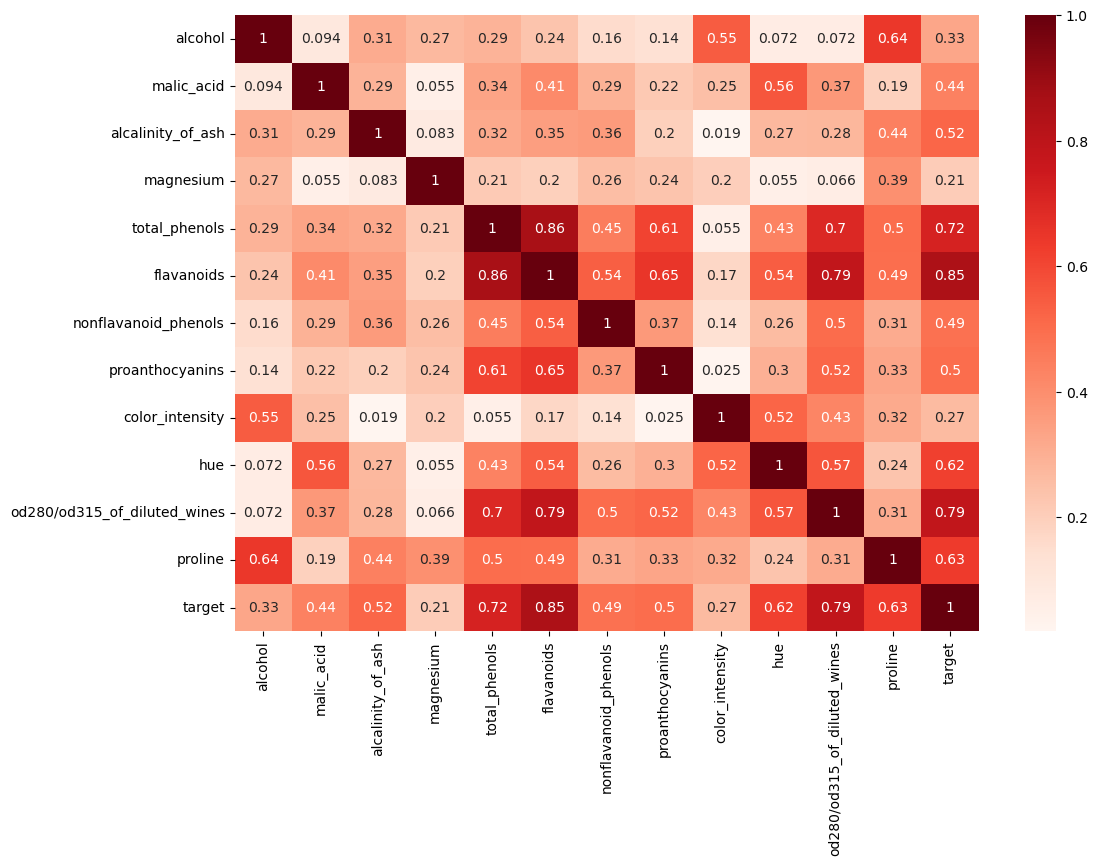

('df_wine_corr',
 Index(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium',
        'total_phenols', 'nonflavanoid_phenols', 'color_intensity', 'hue',
        'proline'],
       dtype='object'))

In [31]:
cor = df_wine_corr.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# drop highly correlated features
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > corr_between_features)]
df_wine_corr = df_wine_corr.drop(df_wine_corr[to_drop], axis=1)
df_wine_corr = df_wine_corr[[cols for cols in df_wine_corr.columns if cols != 'quality']]
'df_wine_corr', df_wine_corr.columns

## Wrapper Methods

Wrapper methods use iterative searches in order to narrow the features set until acquiring the desired number of features recursively. They are mainly used together with a model. Initially, the model is fed with all features and a feature importance score is assigned to each feature. Then the features with the least feature importance score values are pruned. This process continues iteratively until the desired number of features with a greedy approach.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

threshold = 5 # the number of most relevant features
model_rf = RandomForestClassifier(n_estimators=500, random_state=0, max_depth = 3)
selector = RFE(model_rf, n_features_to_select=5, step=1)

selector = selector.fit(df_wine_features, df_wine_target.values.ravel())
selector_ind = selector.get_support()
df_wine_rfe = df_wine_features.iloc[:, selector_ind]
df_wine_rfe.columns

Index(['alcohol', 'flavanoids', 'color_intensity',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
Index(['alcohol', 'flavanoids', 'color_intensity',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


## Embedded Methods

Embedded methods focus on which features best contribute to the accuracy of the model while the model is being created. These kinds of methods have built-in feature importance evaluation mechanisms and include feature selection inside the training process.

In [33]:
from sklearn.feature_selection import SelectFromModel

model_rf = RandomForestClassifier(n_estimators=500, random_state=0, max_depth = 3)
model_rf.fit(df_wine_features, df_wine_target.values.ravel())

sel_sfm = SelectFromModel(model_rf, prefit=True)
sel_sfm_index = sel_sfm.get_support()
df_wine_sfm = df_wine_features.iloc[:, sel_sfm_index]
df_wine_sfm.columns

Index(['alcohol', 'flavanoids', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')